# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 640


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()
#         print(weather_json)
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = (weather_json["coord"]["lat"])
        city_lng = (weather_json["coord"]["lon"])
        city_max_temp = (weather_json["main"]["temp_max"])
        city_humidity = (weather_json["main"]["humidity"])
        city_clouds = (weather_json["clouds"]["all"])
        city_wind = (weather_json["wind"]["speed"])
        city_country = (weather_json["sys"]["country"])
        city_date = (weather_json["dt"])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | shakawe
Processing Record 2 of Set 1 | wanning
Processing Record 3 of Set 1 | torbay
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | deputatskiy
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | sitka
Processing Record 10 of Set 1 | qarqin
Processing Record 11 of Set 1 | ponta do sol
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | nome
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | alto araguaia
Processing Record 16 of Set 1 | chokurdakh
Processing Record 17 of Set 1 | wazzan
City not found. Skipping...
Processing Record 18 of Set 1 | ladnun
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | cidreira
Processing Record 21 of Set 1 | sovik
Processing Record 22 of Set 1 | omsukchan
Processing Record 23 of Se

Processing Record 37 of Set 4 | jacareacanga
Processing Record 38 of Set 4 | marawi
Processing Record 39 of Set 4 | kloulklubed
Processing Record 40 of Set 4 | kamaishi
Processing Record 41 of Set 4 | mayor pablo lagerenza
Processing Record 42 of Set 4 | sokna
Processing Record 43 of Set 4 | souillac
Processing Record 44 of Set 4 | arraial do cabo
Processing Record 45 of Set 4 | namibe
Processing Record 46 of Set 4 | roald
Processing Record 47 of Set 4 | aklavik
Processing Record 48 of Set 4 | talara
Processing Record 49 of Set 4 | pandan
Processing Record 0 of Set 5 | pochutla
Processing Record 1 of Set 5 | sola
Processing Record 2 of Set 5 | ilulissat
Processing Record 3 of Set 5 | brae
Processing Record 4 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 5 of Set 5 | saint george
Processing Record 6 of Set 5 | upernavik
Processing Record 7 of Set 5 | sinkat
City not found. Skipping...
Processing Record 8 of Set 5 | jiangyou
Processing Record 9 of Set 5 | kamina
Proces

City not found. Skipping...
Processing Record 25 of Set 8 | gushikawa
Processing Record 26 of Set 8 | tera
Processing Record 27 of Set 8 | badou
Processing Record 28 of Set 8 | montgomery
Processing Record 29 of Set 8 | yanai
Processing Record 30 of Set 8 | port elizabeth
Processing Record 31 of Set 8 | bam
Processing Record 32 of Set 8 | katsuura
Processing Record 33 of Set 8 | saryshagan
City not found. Skipping...
Processing Record 34 of Set 8 | mantua
Processing Record 35 of Set 8 | half moon bay
Processing Record 36 of Set 8 | general pico
Processing Record 37 of Set 8 | chkalovskoye
Processing Record 38 of Set 8 | bac lieu
Processing Record 39 of Set 8 | hit
Processing Record 40 of Set 8 | kommunisticheskiy
Processing Record 41 of Set 8 | san andres
Processing Record 42 of Set 8 | saint-francois
Processing Record 43 of Set 8 | minot
Processing Record 44 of Set 8 | santa vitoria do palmar
Processing Record 45 of Set 8 | mount isa
Processing Record 46 of Set 8 | shancheng
Processin

Processing Record 17 of Set 12 | kyabram
Processing Record 18 of Set 12 | alihe
Processing Record 19 of Set 12 | palu
Processing Record 20 of Set 12 | maldonado
Processing Record 21 of Set 12 | pangody
Processing Record 22 of Set 12 | ulladulla
Processing Record 23 of Set 12 | macau
Processing Record 24 of Set 12 | presidencia roque saenz pena
Processing Record 25 of Set 12 | mizpe ramon
City not found. Skipping...
Processing Record 26 of Set 12 | basco
Processing Record 27 of Set 12 | jining
Processing Record 28 of Set 12 | bluefields
Processing Record 29 of Set 12 | tambun
Processing Record 30 of Set 12 | hauterive
Processing Record 31 of Set 12 | harlingen
Processing Record 32 of Set 12 | arman
Processing Record 33 of Set 12 | laguna
Processing Record 34 of Set 12 | aubenas
Processing Record 35 of Set 12 | tambopata
Processing Record 36 of Set 12 | bandar-e lengeh
Processing Record 37 of Set 12 | alyangula
Processing Record 38 of Set 12 | altud
Processing Record 39 of Set 12 | nafta

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,shakawe,-18.3667,21.8500,26.61,50,15,2.65,BW,1673507475
1,wanning,18.8003,110.3967,25.91,75,18,3.27,CN,1673507475
2,torbay,47.6666,-52.7314,-7.50,87,34,0.45,CA,1673507476
3,yellowknife,62.4560,-114.3525,-15.80,84,100,4.92,CA,1673507279
4,thompson,55.7435,-97.8558,-20.79,99,15,1.86,CA,1673507476


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,shakawe,-18.3667,21.8500,26.61,50,15,2.65,BW,1673507475
1,wanning,18.8003,110.3967,25.91,75,18,3.27,CN,1673507475
2,torbay,47.6666,-52.7314,-7.50,87,34,0.45,CA,1673507476
3,yellowknife,62.4560,-114.3525,-15.80,84,100,4.92,CA,1673507279
4,thompson,55.7435,-97.8558,-20.79,99,15,1.86,CA,1673507476


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

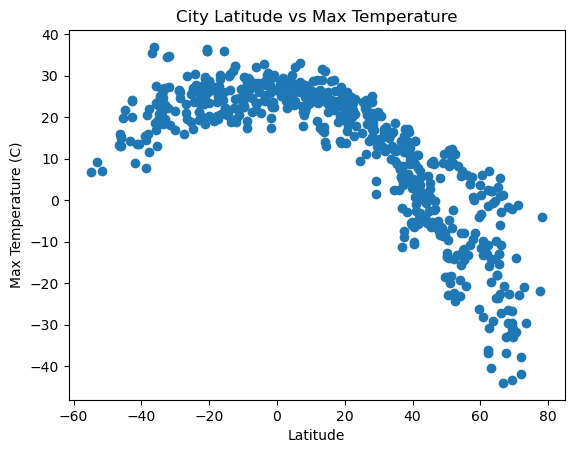

In [30]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.scatter(x_values, y_values,)
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)") #convert to celcius

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

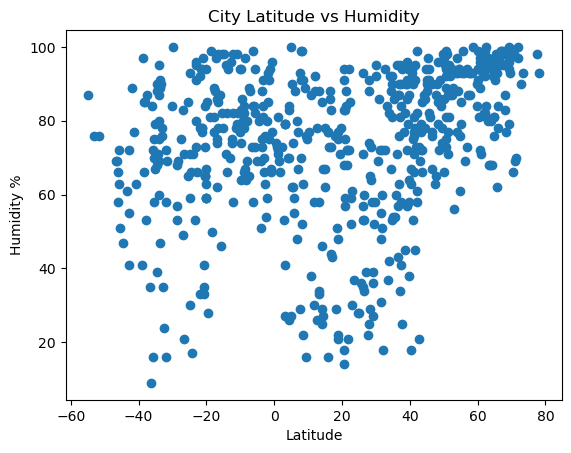

In [31]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(x_values, y_values,)
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

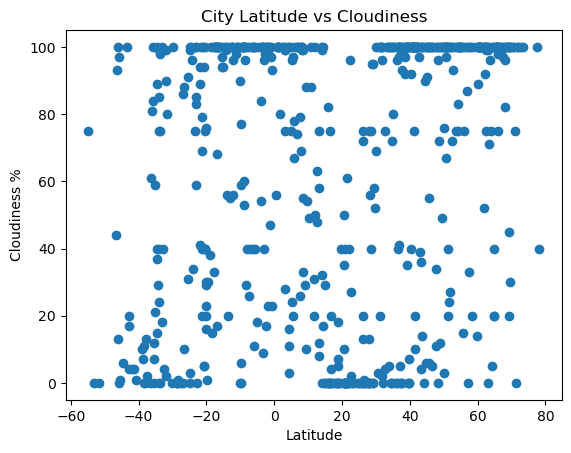

In [32]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(x_values, y_values,)
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

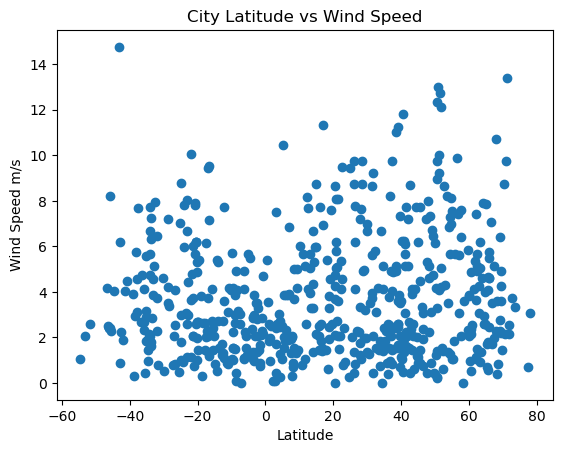

In [33]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(x_values, y_values,)
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed m/s")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
def linear_regress(x_values, y_values, title, text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, text_coordinates, fontsize=11, color="r")
    plt.xlabel("Latitude")
    plt.ylabel("title")
    plt.show()
    print("The r value is: ", rvalue)

In [49]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = (city_data_df.loc[city_data_df["Lat"] >=0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,wanning,18.8003,110.3967,25.91,75,18,3.27,CN,1673507475
2,torbay,47.6666,-52.7314,-7.50,87,34,0.45,CA,1673507476
3,yellowknife,62.4560,-114.3525,-15.80,84,100,4.92,CA,1673507279
4,thompson,55.7435,-97.8558,-20.79,99,15,1.86,CA,1673507476
5,deputatskiy,69.3000,139.9000,-43.36,96,45,2.30,RU,1673507477


In [50]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <0]
#southern_hemi_df.reset_index("City_ID", inplace=True)


# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,shakawe,-18.3667,21.8500,26.61,50,15,2.65,BW,1673507475
7,mataura,-46.1927,168.8643,15.92,58,100,2.43,NZ,1673507477
13,ushuaia,-54.8000,-68.3000,6.81,87,75,1.03,AR,1673507479
14,alto araguaia,-17.3147,-53.2153,19.43,97,100,2.30,BR,1673507479
17,atuona,-9.8000,-139.0333,25.63,74,6,5.71,PF,1673507482


###  Temperature vs. Latitude Linear Regression Plot

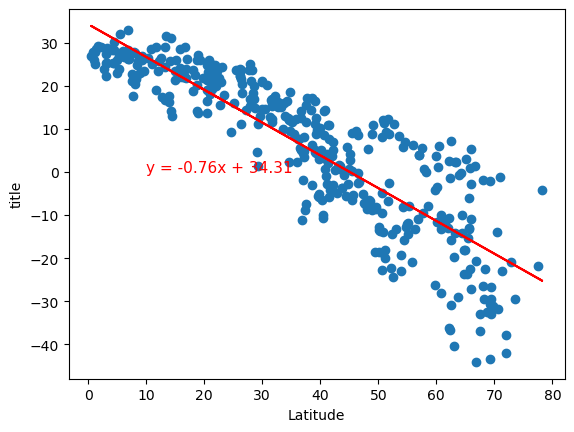

The r value is:  -0.8690011163488084


In [51]:
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
# defining the values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
title = ("Max Temperature (C)")
text_coordinates = (10, 0)

# use the defined funtion to show the plotted chart
linear_regress(x_values, y_values, title, text_coordinates)


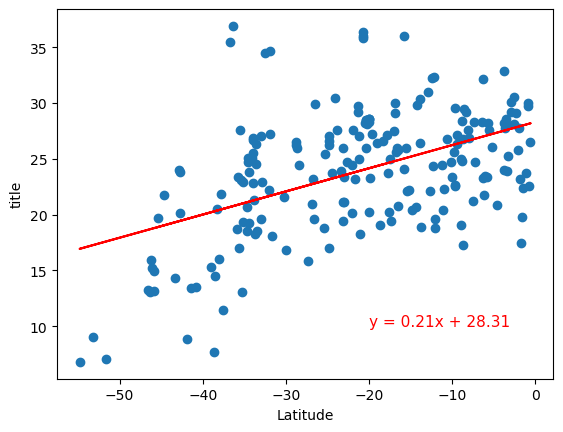

The r value is:  0.4890576258859044


In [52]:
# Linear regression on Southern Hemisphere
# Build scatter plot for latitude vs. temperature
# Define the values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
text_coordinates = (-20, 10)
title = ("Max Temperature (C)")

# use the defined funtion to show the plotted chart
linear_regress(x_values, y_values, title, text_coordinates)


**Discussion about the linear relationship:** The linear regression shows that the closer a city is sitting to the equator/latitude 0, the warmer the city will be.

### Humidity vs. Latitude Linear Regression Plot

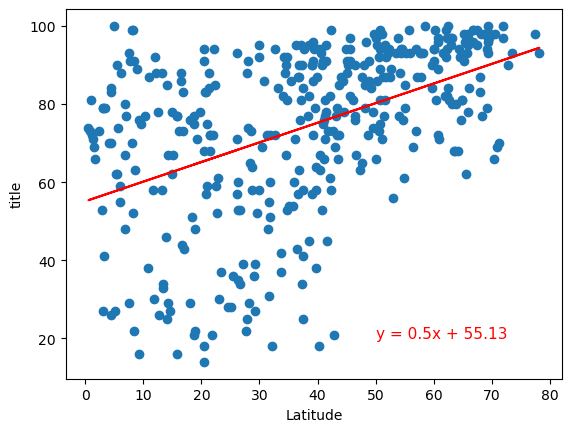

The r value is:  0.4680921247617451


In [53]:
# Northern Hemisphere
# Define the values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
text_coordinates = (50,20)
title = ("Humidity")

# use the defined funtion to show the plotted chart
linear_regress(x_values, y_values, title, text_coordinates)


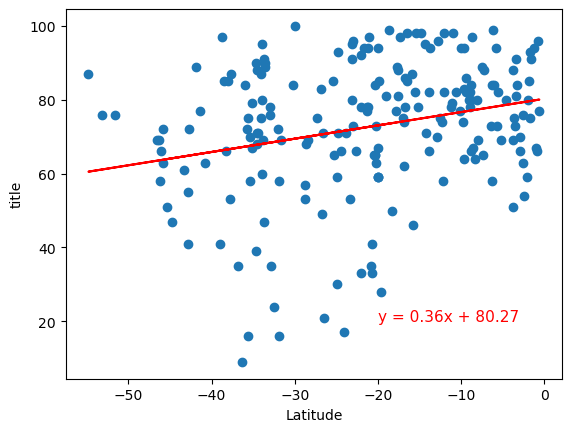

The r value is:  0.25914833556050015


In [54]:
# Southern Hemisphere
# Define the values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
text_coordinates = (-20, 20)
title = ("Humidity")

# use the defined funtion to show the plotted chart
linear_regress(x_values, y_values, title, text_coordinates)


**Discussion about the linear relationship:** The linear regression shows the higher the latitude, the higher the humidity will be.

### Cloudiness vs. Latitude Linear Regression Plot

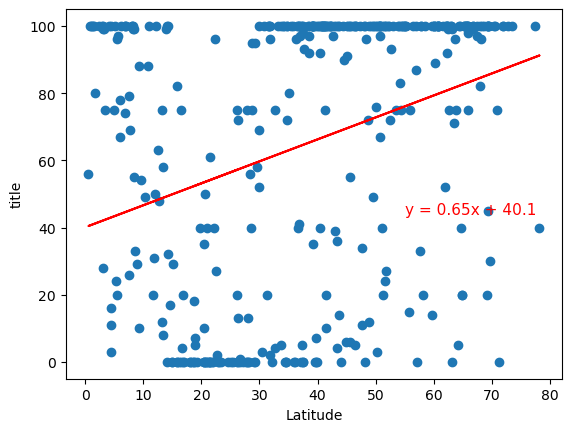

The r value is:  0.31696291246062297


In [55]:
# Northern Hemisphere
# Define the values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
text_coordinates = (55, 44)
title = ("Cloudiness")

# use the defined funtion to show the plotted chart
linear_regress(x_values, y_values, title, text_coordinates)


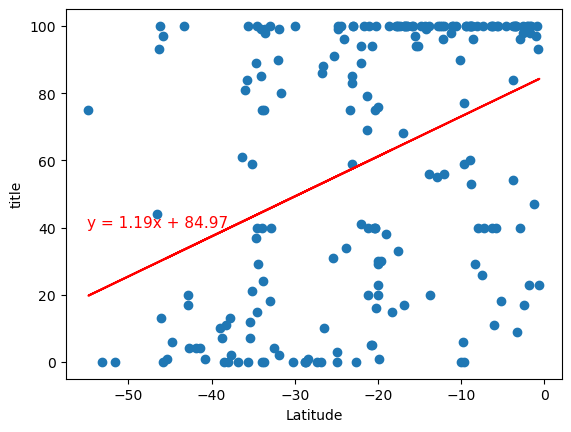

The r value is:  0.3941033930772637


In [56]:
# Southern Hemisphere
# Define the values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
text_coordinates = (-55, 40)
title = ("Cloudiness")

# use the defined funtion to show the plotted chart
linear_regress(x_values, y_values, title, text_coordinates)


**Discussion about the linear relationship:** The linear regression shows that the higher the latitude, the cloudier the sky will be.

### Wind Speed vs. Latitude Linear Regression Plot

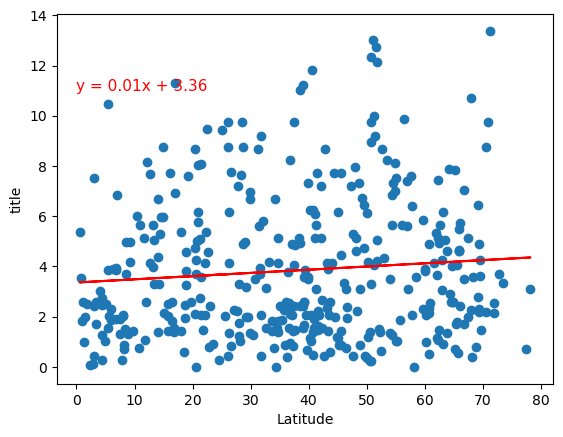

The r value is:  0.0908641097056699


In [57]:
# Northern Hemisphere
# Define the values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
text_coordinates = (0, 11)
title = ("Wind Speed")

# use the defined funtion to show the plotted chart
linear_regress(x_values, y_values, title, text_coordinates)

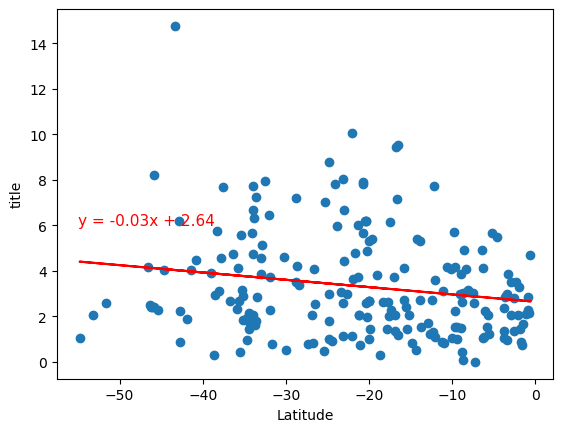

The r value is:  -0.1857411235639184


In [58]:
# Southern Hemisphere
# Define the values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
text_coordinates = (-55, 6)
title = ("Wind Speed")

# use the defined funtion to show the plotted chart
linear_regress(x_values, y_values, title, text_coordinates)


**Discussion about the linear relationship:** The linear regression shows that the northern hemisphere doesn't really have a change in wind speed whether you are near or far from the equator/latitude 0, however, in the southern hemisphere, the south a city sits, the higher their windspeed will be.